In [1]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from gensim.parsing.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from nrclex import NRCLex
import collections, functools, operator
%run functions.ipynb

In [2]:
df = pd.read_csv(r'C:\Users\chery\Desktop\python_proj\all_reviews.csv')

df

,Hotel Name,Content,Rating,Date of stay,Unnamed: 4
0,Andaz Singapore - a concept by Hyatt,Rather difficult to find receptionist because ...,8.0,10-Feb-18,NaN
1,Andaz Singapore - a concept by Hyatt,Beautiful design and great location (near mrt ...,10.0,3-Aug-18,NaN
2,Andaz Singapore - a concept by Hyatt,Not good service. baggage send to my room to s...,3.0,30-Sep-18,NaN
3,Andaz Singapore - a concept by Hyatt,Very good location in Bugis area. Transpiratio...,10.0,8-Aug-19,NaN
4,Andaz Singapore - a concept by Hyatt,"Great location to mrt station Bugis, just go t...",10.0,210/12/2019,NaN
...,...,...,...,...,...
9372,York Hotel Singapore,"Wonderful staff service at the reception, at t...",10.0,Dec-21,NaN
9373,York Hotel Singapore,York hotel is what I would call a hotel that i...,10.0,Dec-21,NaN
9374,York Hotel Singapore,Nice place for family or friends staycation wi...,8.0,Dec-21,NaN
9375,York Hotel Singapore,Location is good. Room was big and spacious. A...,10.0,Dec-21,NaN


In [3]:
neg_reviews(df)

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4
1264,Furama City Centre,NaN,"Smelly room, room is cleaned once in 3 days.",1.0,16-Sep-22,NaN
1265,Furama City Centre,NaN,Electricity out for 2 days so had to get staff...,1.0,8-Oct-22,NaN
2037,Hilton Singapore Orchard (SG Clean),NaN,"Arrived late at night after a long flight, and...",1.0,7-Aug-22,NaN
3022,Hotel Royal,NaN,Dirty toilet and dirty bedcover 👎.,1.0,10-Oct-22,NaN
28,Aqueen Hotel Paya Lebar,NaN,My booking with Expedia was confirmed and paid...,2.0,30-Nov-17,NaN
...,...,...,...,...,...,...
9295,York Hotel Singapore,NaN,Worst stayed at York Singapore. When we checke...,4.0,May-22,NaN
9308,York Hotel Singapore,NaN,Disappointed. We asked for another room as the...,4.0,Oct-19,NaN
9317,York Hotel Singapore,NaN,Room was not soundproof and the room was overp...,4.0,Sep-19,NaN
9328,York Hotel Singapore,NaN,We had a four day stop over after coming from ...,4.0,Nov-19,NaN


In [4]:
pos_df=pos_reviews(df)
pos_df

,Hotel Name,Title,Content,Rating,Date of stay,Unnamed: 4
0,Andaz Singapore - a concept by Hyatt,NaN,Rather difficult to find receptionist because ...,8.0,10-Feb-18,NaN
9,Aqueen Hotel Paya Lebar,NaN,"Hotel is fine, only issue is thin walls, you c...",8.0,1-Mar-19,NaN
10,Aqueen Hotel Paya Lebar,NaN,Fresh air and surprising the bed and pillow ar...,8.0,26-Feb-19,NaN
11,Aqueen Hotel Paya Lebar,NaN,good service.,8.0,7-Feb-19,NaN
12,Aqueen Hotel Paya Lebar,NaN,Good ok la,8.0,9-Jan-19,NaN
...,...,...,...,...,...,...
9351,York Hotel Singapore,NaN,An old hotel with a very convenient location.w...,6.0,Dec-21,NaN
9362,York Hotel Singapore,NaN,"Good location, very spacy rooms, clean However...",6.0,Nov-21,NaN
9365,York Hotel Singapore,NaN,Booked the Superior Room for a 2D1N staycation...,6.0,Dec-21,NaN
9370,York Hotel Singapore,NaN,"For a 4 star hotel, service & amenities expect...",6.0,Dec-21,NaN


In [5]:
rating_df=pd.read_csv(r'C:\Users\chery\Desktop\python_proj\all_subratings.csv')

In [6]:
top10_words=clean_words(pos_df)

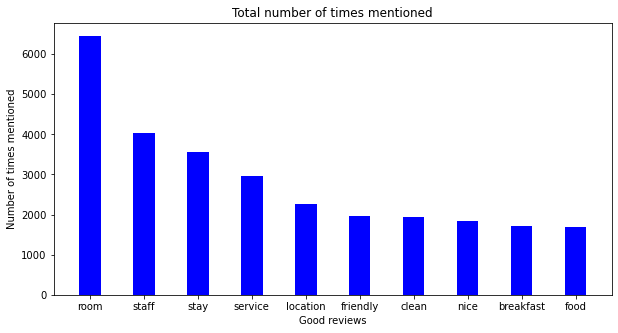

In [7]:
top_words_graph(top10_words)

In [8]:
filtered_reviews=filtered_reviews_based_on_top10(top10_words, pos_df)

In [9]:
first_top_df=separate_reviews(filtered_reviews,top10_words)[0]

In [10]:
second_top_df=separate_reviews(filtered_reviews,top10_words)[1]

In [11]:
third_top_df=separate_reviews(filtered_reviews,top10_words)[2]

In [12]:
fourth_top_df=separate_reviews(filtered_reviews,top10_words)[3]

In [13]:
fifth_top_df=separate_reviews(filtered_reviews,top10_words)[4]

In [14]:
sixth_top_df=separate_reviews(filtered_reviews,top10_words)[5]

In [15]:
seventh_top_df=separate_reviews(filtered_reviews,top10_words)[6]

In [16]:
eighth_top_df=separate_reviews(filtered_reviews,top10_words)[7]

In [17]:
ninth_top_df=separate_reviews(filtered_reviews,top10_words)[8]

In [18]:
tenth_top_df=separate_reviews(filtered_reviews,top10_words)[9]

In [19]:
first_top_df=convert_to_dataframe(first_top_df, pos_df)
first_top_df['Popular_Word']='room'

In [20]:
second_top_df=convert_to_dataframe(second_top_df, pos_df)
second_top_df['Popular_Word']='staff'

In [21]:
third_top_df=convert_to_dataframe(third_top_df, pos_df)
third_top_df['Popular_Word']='stay'

In [22]:
fourth_top_df=convert_to_dataframe(fourth_top_df, pos_df)
fourth_top_df['Popular_Word']='service'

In [23]:
fifth_top_df=convert_to_dataframe(fifth_top_df, pos_df)
fifth_top_df['Popular_Word']='location'

In [24]:
sixth_top_df=convert_to_dataframe(sixth_top_df, pos_df)
sixth_top_df['Popular_Word']='friendly'

In [25]:
seventh_top_df=convert_to_dataframe(seventh_top_df, pos_df)
seventh_top_df['Popular_Word']='clean'

In [26]:
eighth_top_df=convert_to_dataframe(eighth_top_df, pos_df)
eighth_top_df['Popular_Word']='nice'

In [27]:
ninth_top_df=convert_to_dataframe(ninth_top_df, pos_df)
ninth_top_df['Popular_Word']='breakfast'

In [28]:
tenth_top_df=convert_to_dataframe(tenth_top_df, pos_df)
tenth_top_df['Popular_Word']='food'

In [29]:
unique_df=concat_dataframes_get_unique_hotels(first_top_df, second_top_df,third_top_df,fourth_top_df,fifth_top_df,sixth_top_df,seventh_top_df,eighth_top_df,ninth_top_df,tenth_top_df)

In [30]:
 #get unique hotel names
UniqueNames = unique_df.Hotel_Name.unique()

#create a data frame dictionary to store your data frames
UniqueHotel = {elem : pd.DataFrame() for elem in UniqueNames}

for key in UniqueHotel.keys():
    UniqueHotel[key] = unique_df[:][unique_df.Hotel_Name == key]

In [31]:
list_of_unique_hotel_df=unique_hotels_df(UniqueNames)

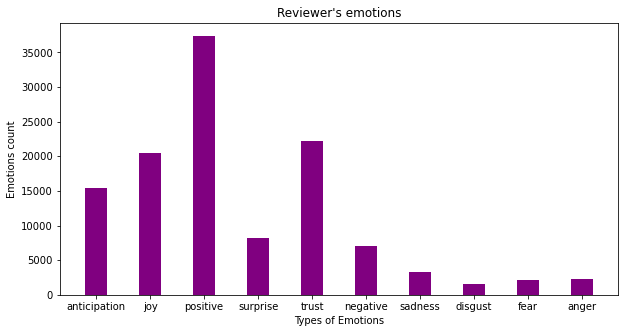

In [32]:
graph_for_reviewers_emotions(list_of_unique_hotel_df)

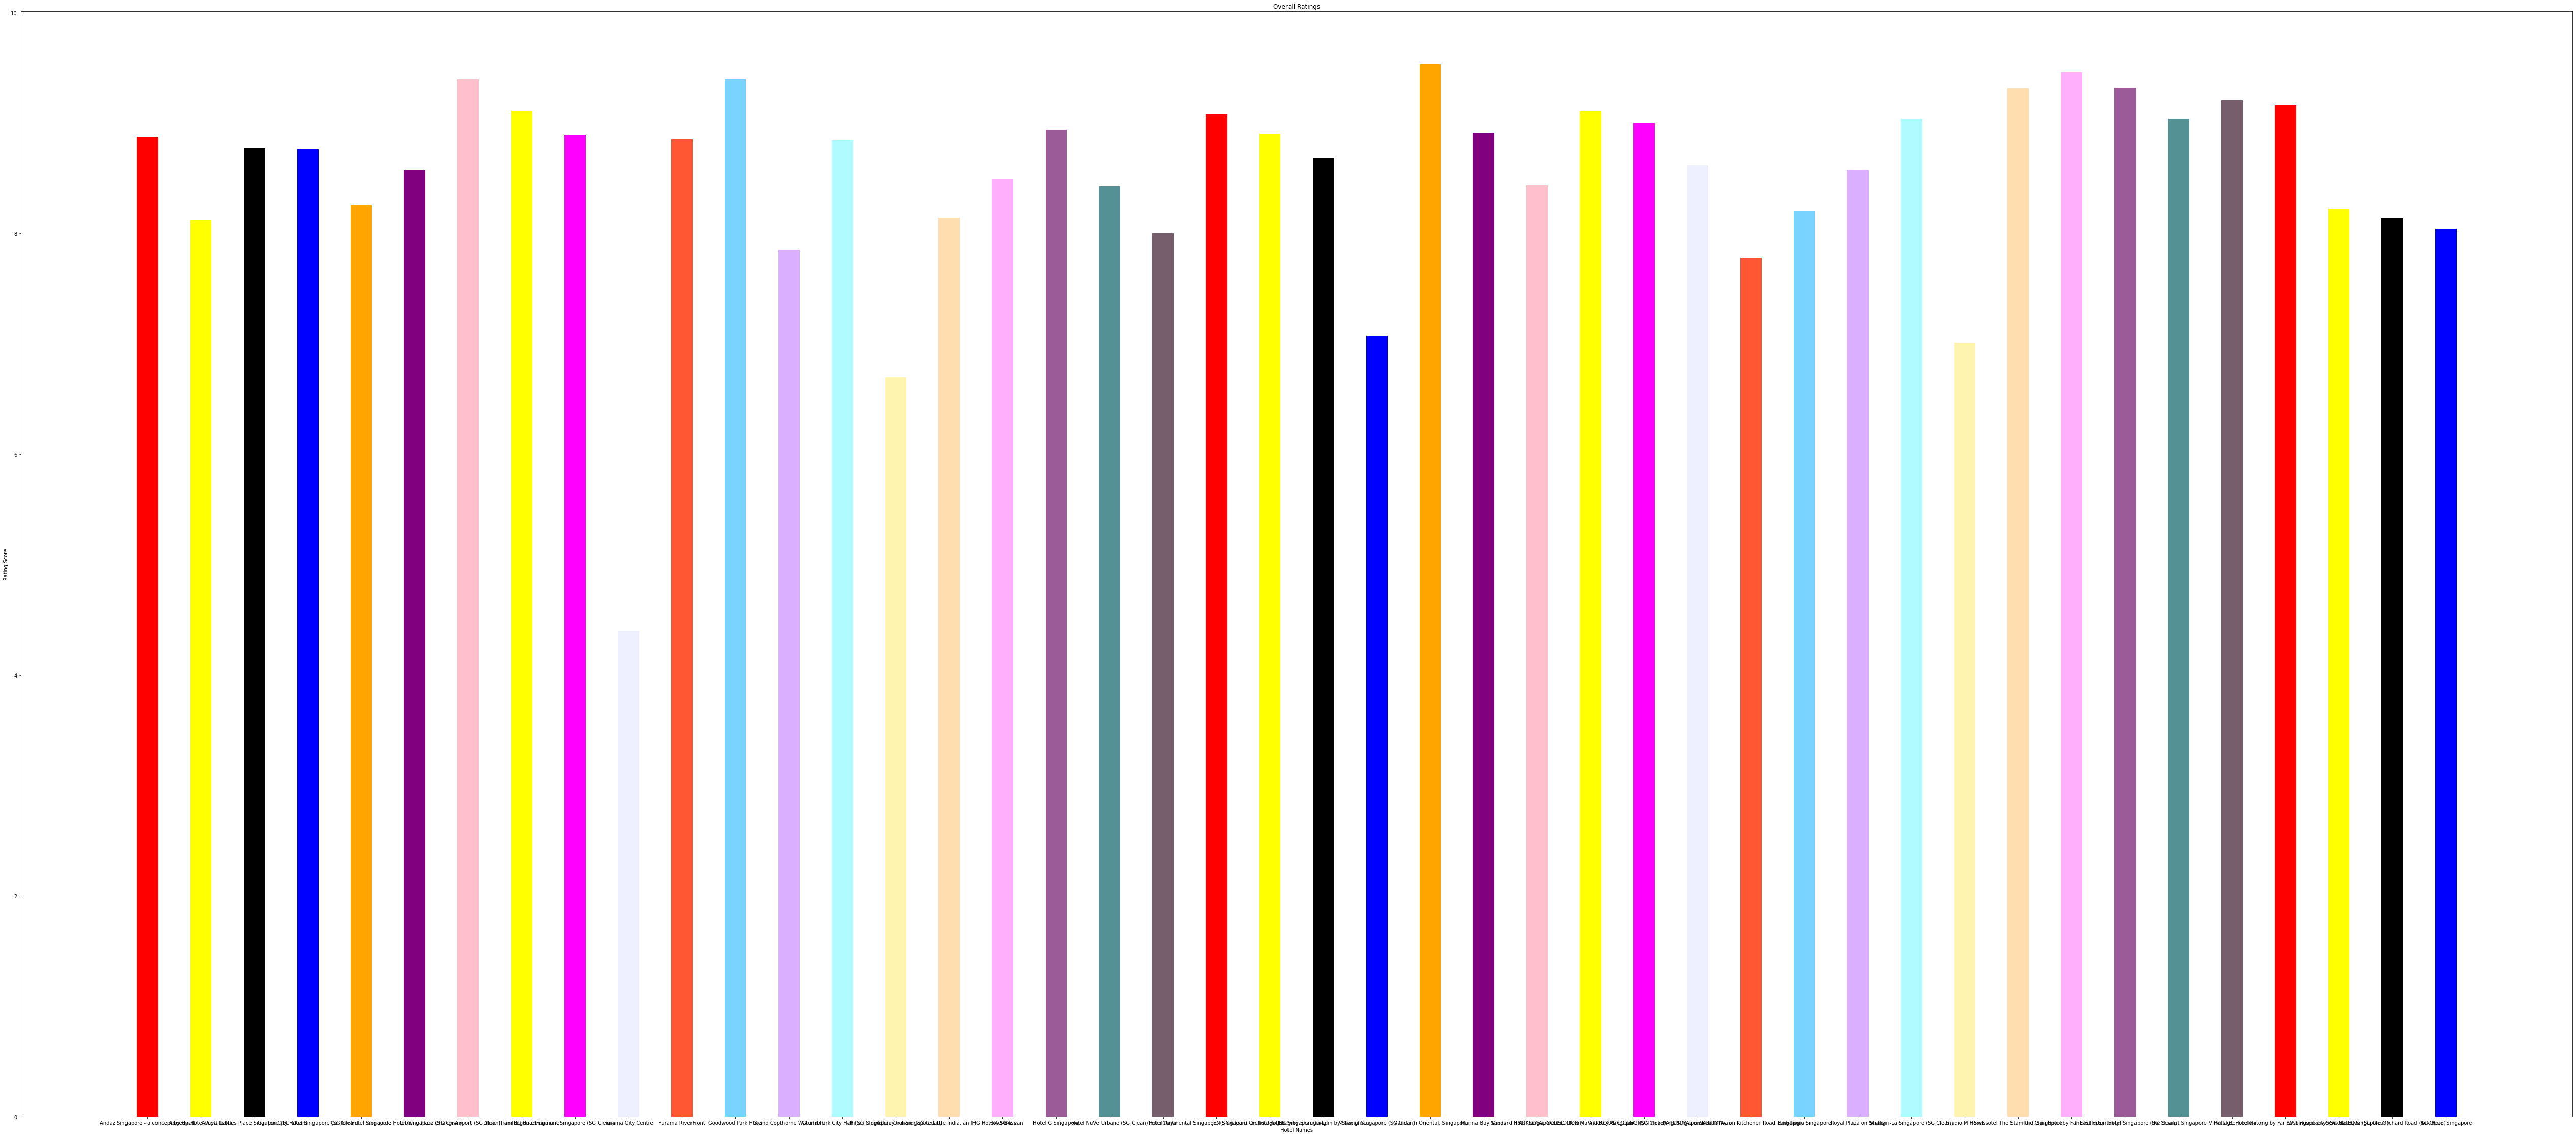

In [34]:
graph_for_overall_rating(df, UniqueNames)

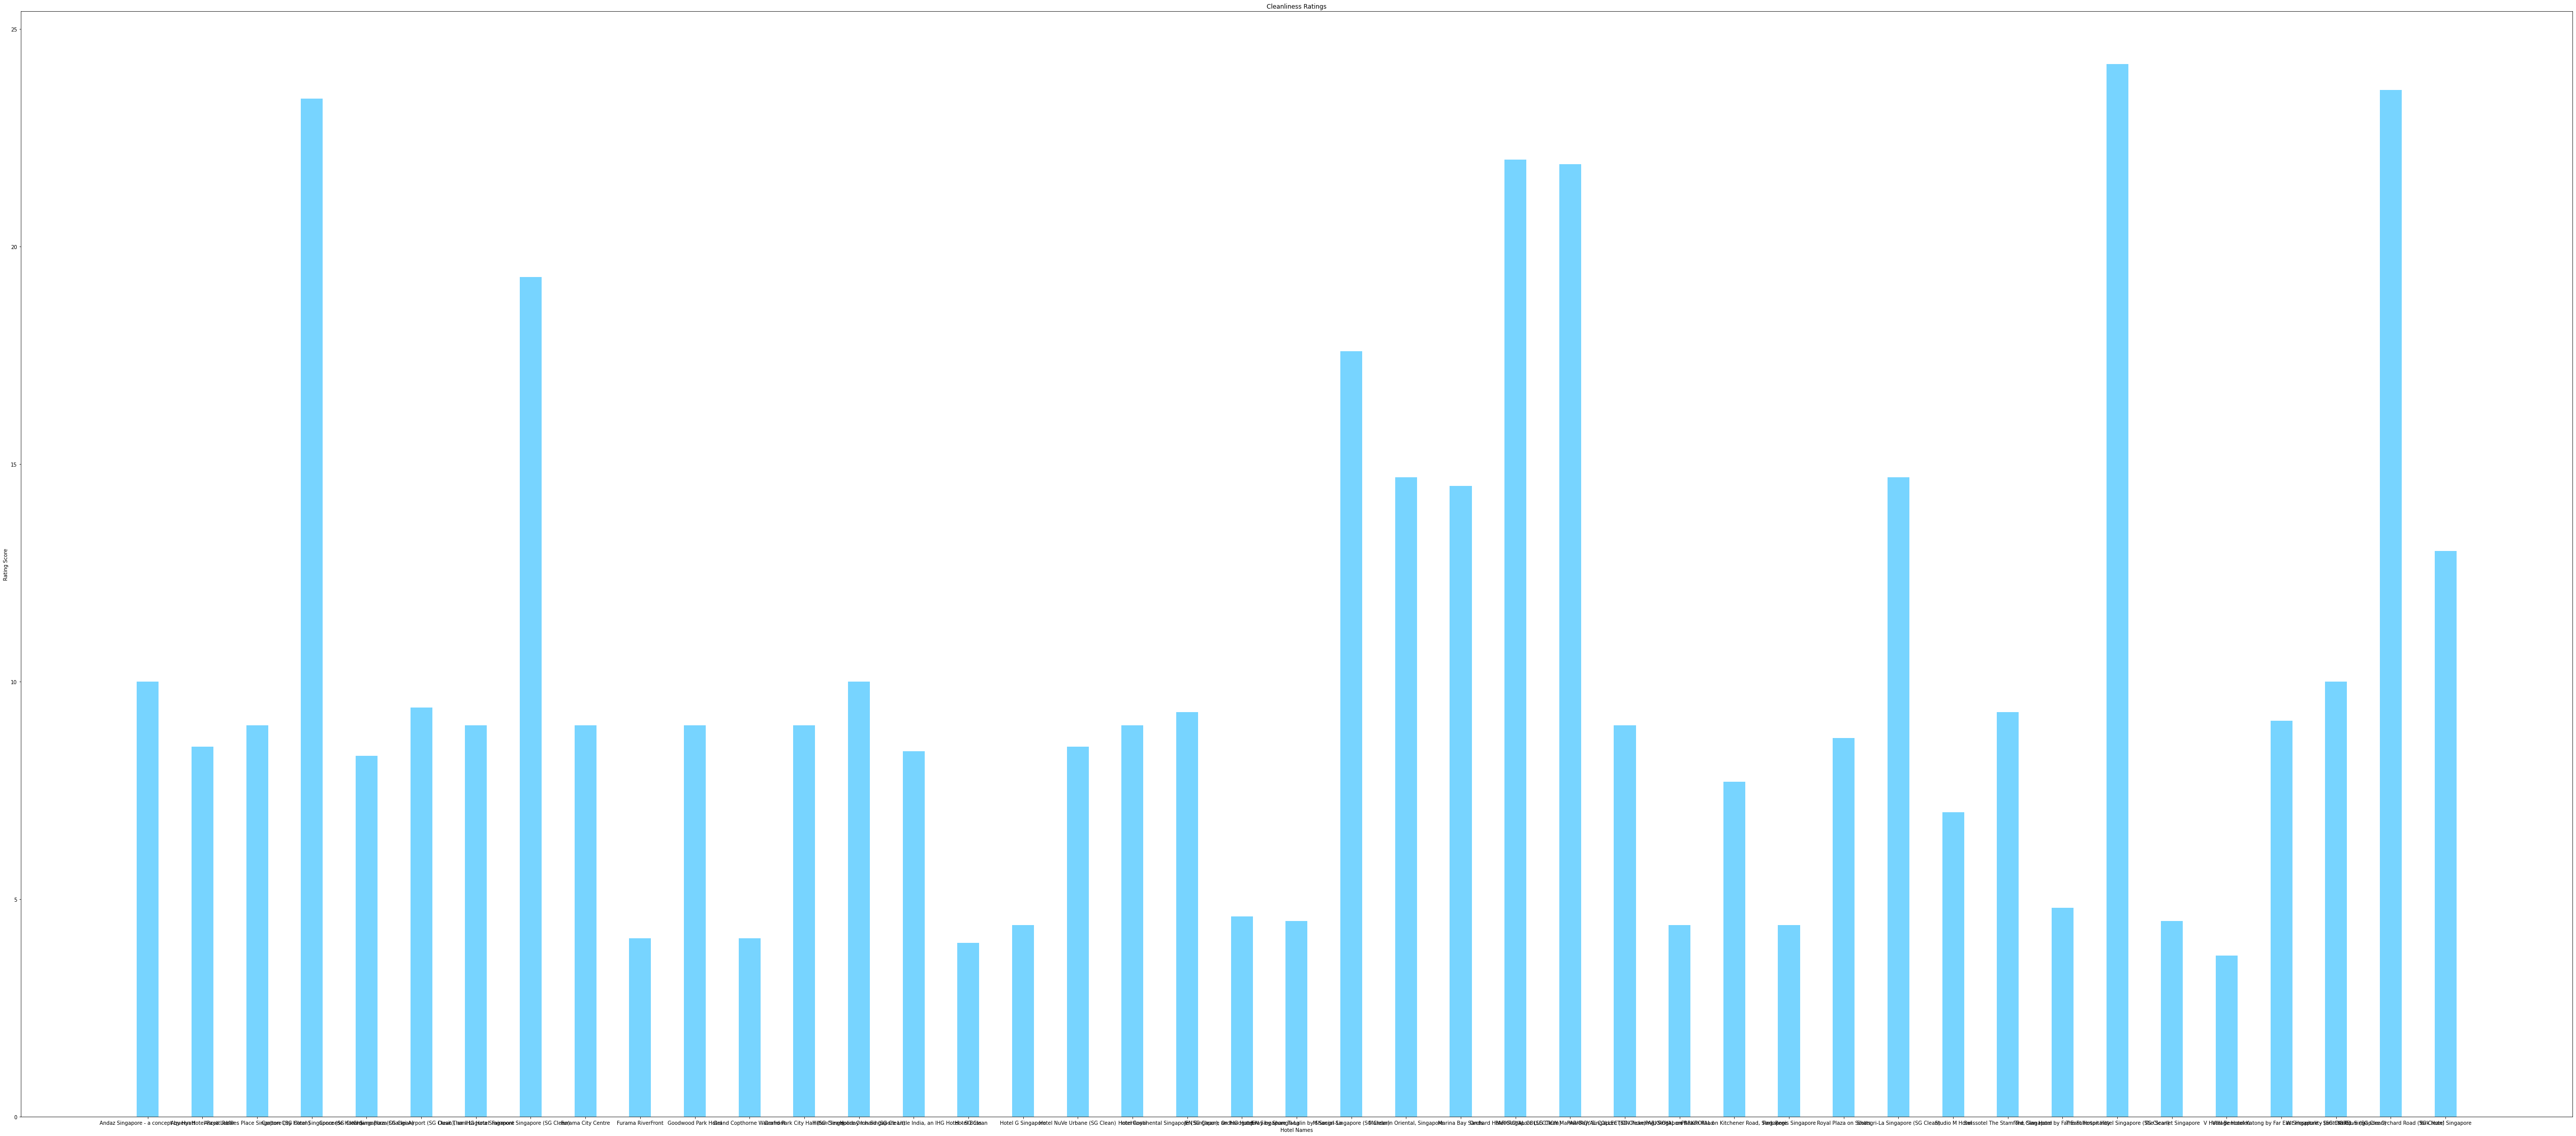

In [36]:
graph_for_cleanliness_rating(rating_df)

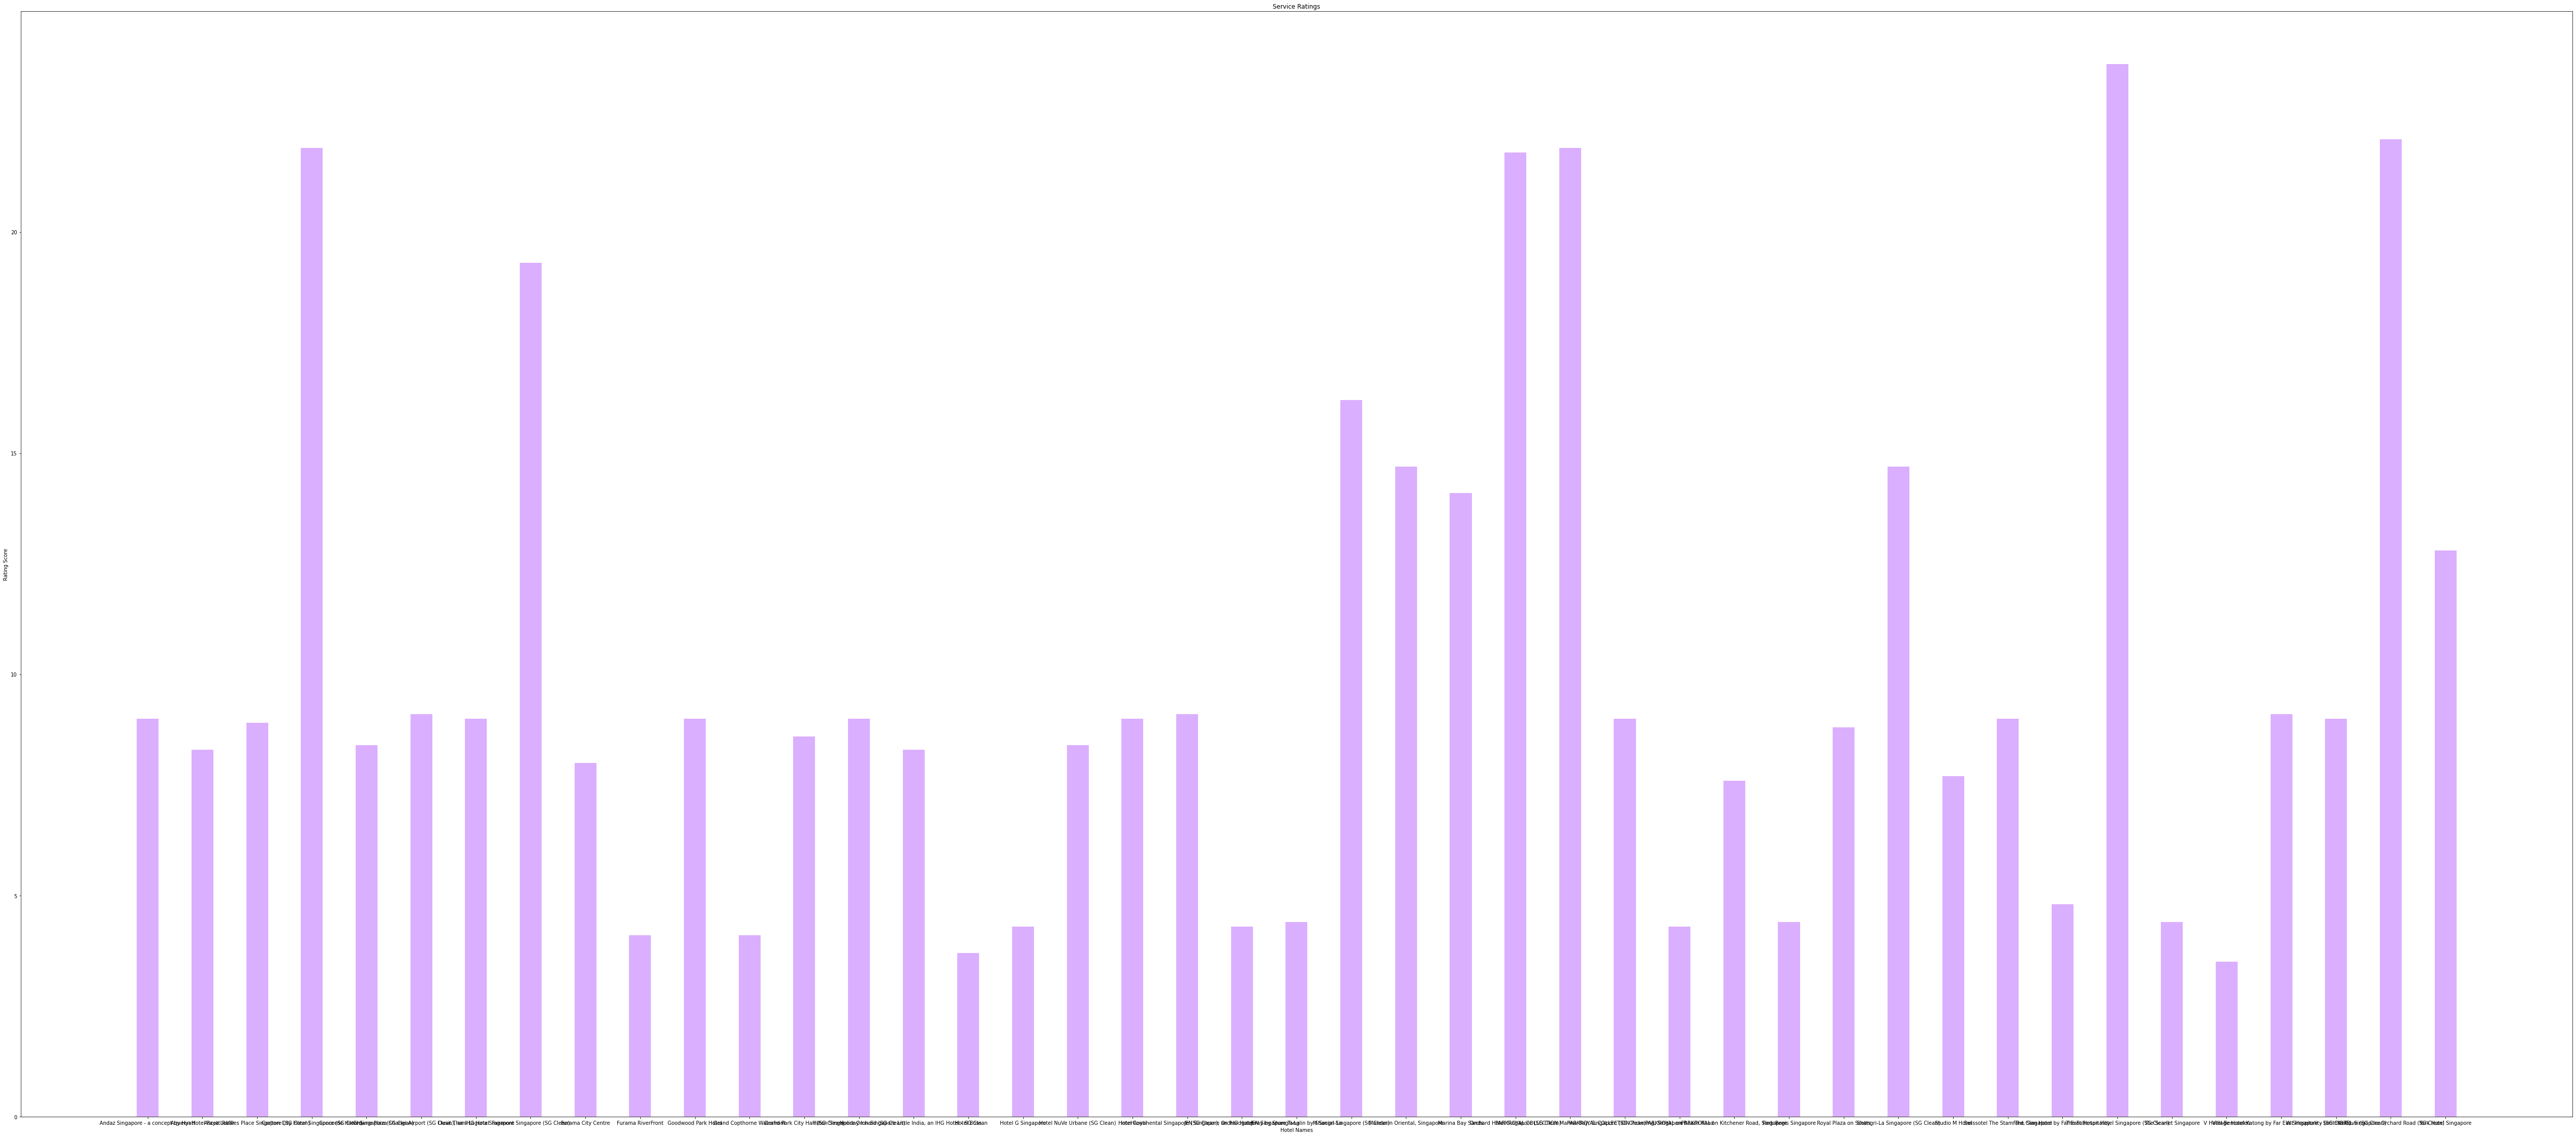

In [38]:
graph_for_service_rating(rating_df)